# LSTM Currency Prediction

## Requirements

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Input
from keras.utils import plot_model

In [2]:
model_name = "lstmv1EURtoJPY"

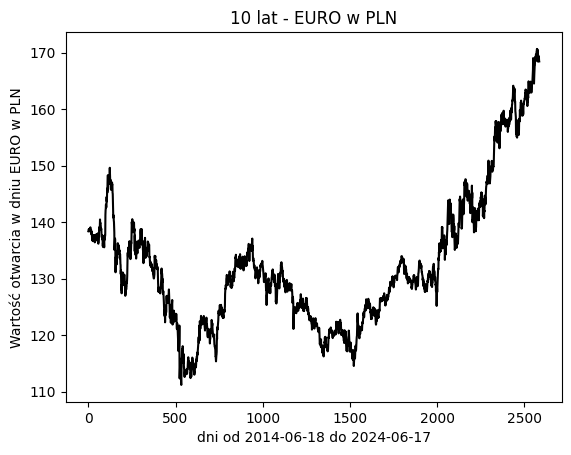

In [3]:
input_data = 'eurjpy_d.csv'
df = pd.read_csv(input_data)

X = np.arange(len(df)).reshape(-1, 1)
y = df['Otwarcie'].values
first_day = df['Data'].values[0]
last_day = df['Data'].values[-1]
first_year = int(first_day.split('-')[0])
last_year = int(last_day.split('-')[0])
year_diff = last_year - first_year

plt.plot(X, y, color='black', label='Data')
plt.xlabel(f'dni od {first_day} do {last_day}')
plt.ylabel('Wartość otwarcia w dniu EURO w PLN')
plt.title(f'{year_diff} lat - EURO w PLN')
plt.savefig(f'data_{model_name}.png')
plt.show()

min_y = np.min(y)
max_y = np.max(y)
y = (y - min_y) / (max_y - min_y)

In [4]:
def create_sequences(y_data, seq_length):
    X_sequences = []
    y_labels = []
    for i in range(len(y_data) - seq_length):
        X_sequences.append(y_data[i:i + seq_length])
        y_labels.append(y_data[i + seq_length])
    return np.array(X_sequences), np.array(y_labels)

In [5]:
seq_length = 50

In [6]:
X_seq, y_seq = create_sequences(y, seq_length)
print(f'Kształt X_seq: {X_seq.shape}, Kształt y_seq: {y_seq.shape}')

Kształt X_seq: (2536, 50), Kształt y_seq: (2536,)


In [7]:
split_index = round(0.7 * len(X_seq))
X_train, X_test = X_seq[:split_index], X_seq[split_index:]
y_train, y_test = y_seq[:split_index], y_seq[split_index:]
print(f'Kształt X_train: {X_train.shape}, Kształt y_train: {y_train.shape}')
print(f'Kształt X_test: {X_test.shape}, Kształt y_test: {y_test.shape}')

Kształt X_train: (1775, 50), Kształt y_train: (1775,)
Kształt X_test: (761, 50), Kształt y_test: (761,)


In [8]:
Dropout_rate = 0.2
model = Sequential([
    Input(shape=(seq_length, 1)),
    LSTM(seq_length // 2, kernel_initializer='random_normal'),
    Dropout(Dropout_rate),
    Dense(1)  
])

2024-06-18 16:44:07.267816: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2024-06-18 16:44:07.267842: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-06-18 16:44:07.267849: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-06-18 16:44:07.267888: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-06-18 16:44:07.267902: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [10]:
batch_size = round(len(X_train) / 10)
print('batch_size =', batch_size)
history = model.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=batch_size,
                    verbose=1)

batch_size = 178
Epoch 1/100


2024-06-18 16:44:07.652740: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - loss: 0.0659
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0184
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0101
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0076
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0063
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0053
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0043
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0033
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0026
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0024
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0025
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0021
Epoch 13/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0022
Epoch 14/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0020
Epoch 15/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0021
E

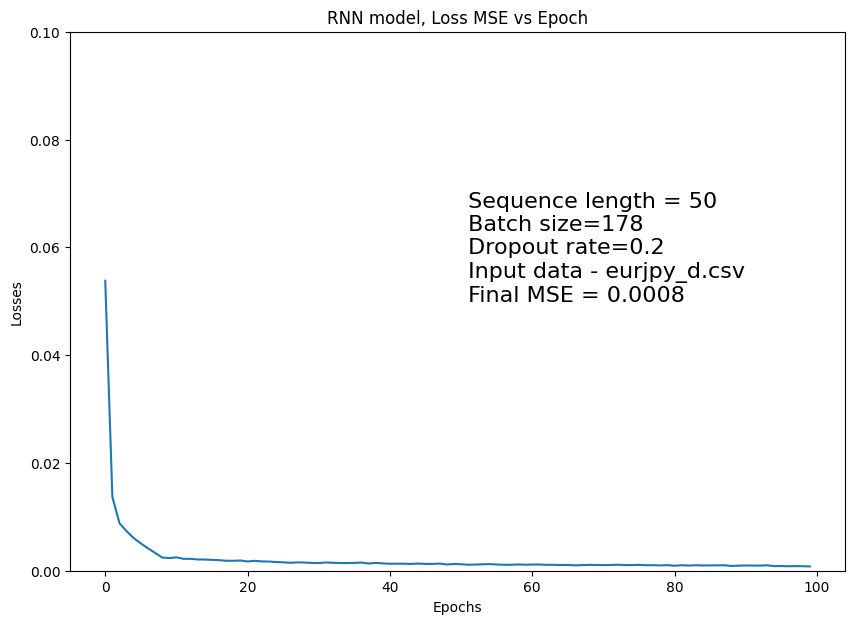

In [11]:
plt.figure(figsize=(10, 7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("RNN model, Loss MSE vs Epoch")
plt.ylim(0, 0.1)  
mid_x = len(history.history["loss"]
            ) / 2 
mid_y = 0.05  
plt.text(
    mid_x,
    mid_y,
    f' Sequence length = {seq_length} \n Batch size={batch_size} \n Dropout rate={Dropout_rate} \n Input data - {input_data} \n Final MSE = {round(history.history["loss"][-1],5)}',
    fontsize=16,
    ha='left')
plt.savefig(f'history_{model_name}.png')
plt.show()

56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


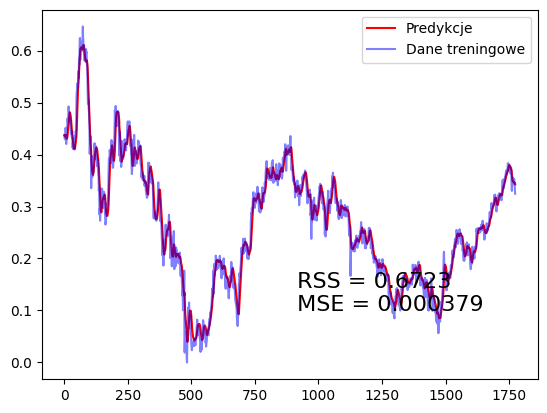

In [12]:
predictions_train = model.predict(X_train)

plt.plot(predictions_train.flatten(), color='red', label='Predykcje')
plt.plot(y_train.flatten(), color='blue', label='Dane treningowe', alpha=0.5)
plt.legend()
mid_x = len(
    predictions_train) / 2  
mid_y = 1 / 10  

plt.text(
    mid_x,
    mid_y,
    f' RSS = {round(np.sum((predictions_train.flatten() - y_train.flatten()) ** 2),4)} \n MSE = {round(np.mean((predictions_train.flatten() - y_train.flatten()) ** 2),6)} ',
    fontsize=16,
    ha='left')  
plt.savefig(f'pred_train_{model_name}.png')
plt.show()

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


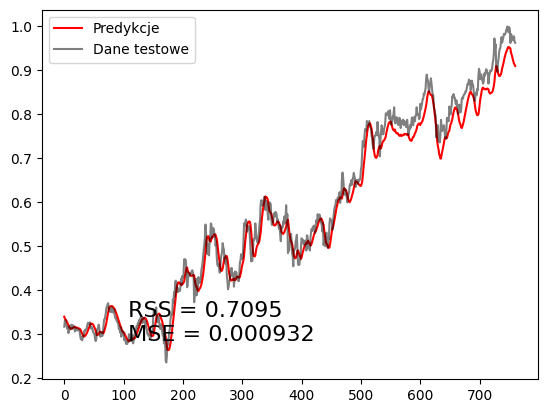

In [13]:
predictions_test = model.predict(X_test)

plt.plot(predictions_test.flatten(), color='red', label='Predykcje', alpha=1)
plt.plot(y_test.flatten(), color='black', label='Dane testowe', alpha=0.5)
plt.legend()
mid_x = len(
    predictions_test) / 8  
mid_y = 10 / 35  

plt.text(
    mid_x,
    mid_y,
    f' RSS = {round(np.sum((predictions_test.flatten() - y_test.flatten()) ** 2),4)} \n MSE = {round(np.mean((predictions_test.flatten() - y_test.flatten()) ** 2),6)} ',
    fontsize=16,
    ha='left')  
plt.savefig(f'pred_test_{model_name}.png')
plt.show()

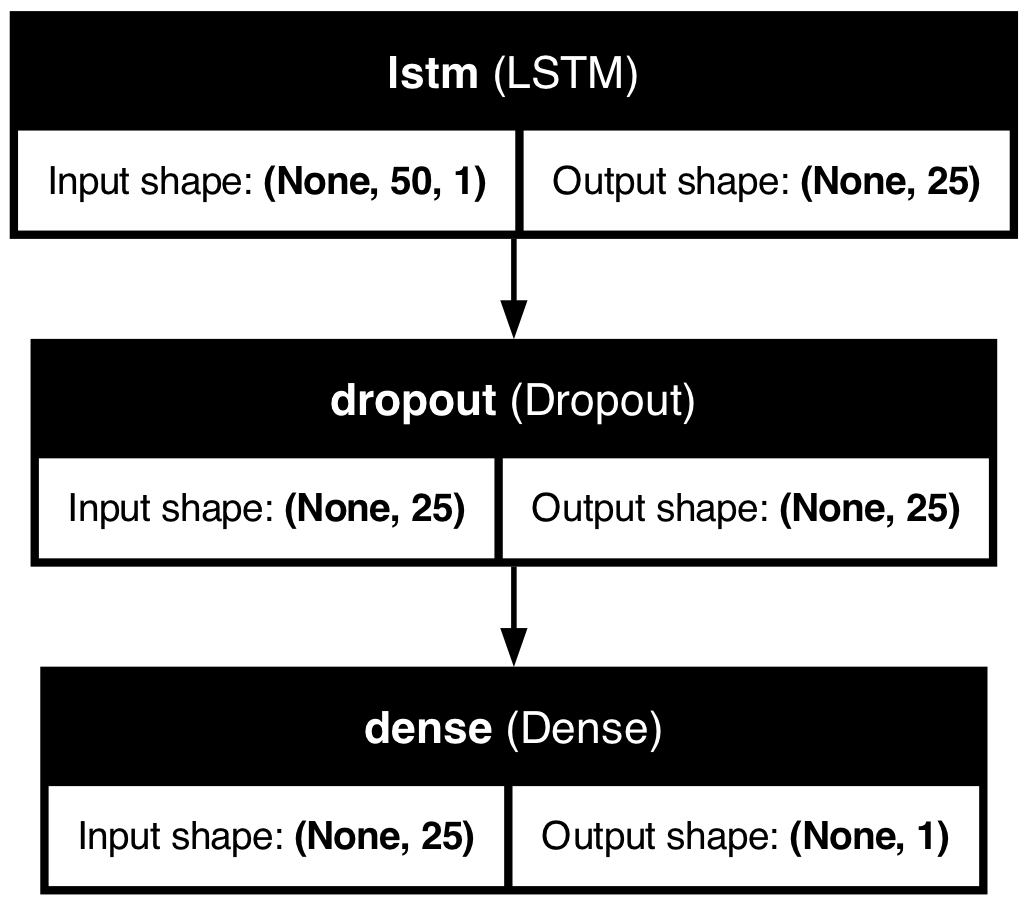

In [15]:
plot_model(model,
           to_file=f'architecture_{model_name}.png',
           show_shapes=True,
           show_layer_names=True)